<a href="https://colab.research.google.com/github/utsabsarkar12/Machine_Learning/blob/main/Built_in_classification_dataset_from_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

In [39]:
# Load dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [40]:
print("Feature names:", data.feature_names)
print("\nTarget classes:", data.target_names)
print("\nDataset shape:", df.shape)

Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Target classes: ['malignant' 'benign']

Dataset shape: (569, 31)


In [41]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Decesion Tree Model

In [27]:
# Train
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict
dt_pred = dt_model.predict(X_test)

# Accuracy
dt_acc = accuracy_score(y_test, dt_pred)
print(f"📌 Decision Tree Accuracy: {dt_acc:.4f}")

# Classification Report
print("\nClassification Report (Decision Tree):\n")
print(classification_report(y_test, dt_pred))


📌 Decision Tree Accuracy: 0.9474

Classification Report (Decision Tree):

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



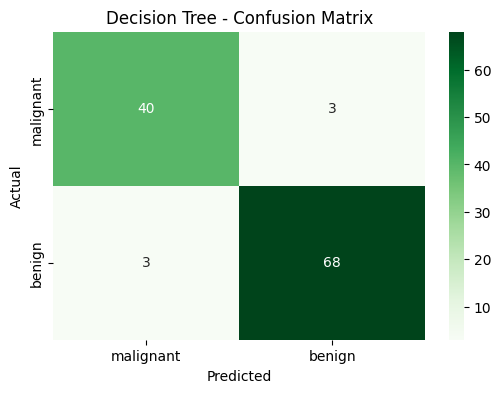

In [28]:
# Confusion Matrix
cm_dt = confusion_matrix(y_test, dt_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens', xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

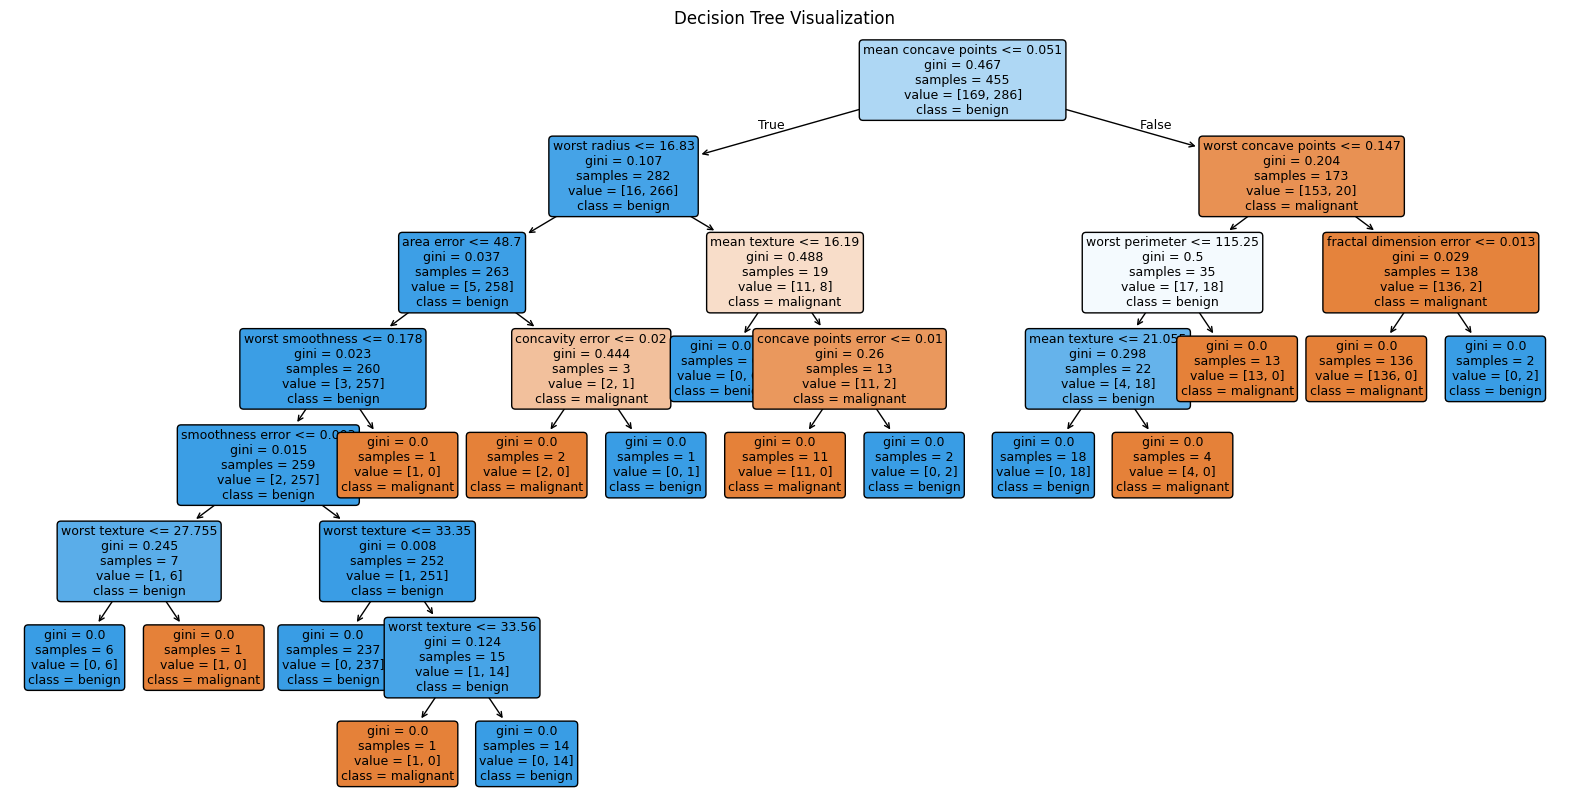

In [29]:
# Plot Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, filled=True, feature_names=data.feature_names, class_names=data.target_names, rounded=True, fontsize=9)
plt.title("Decision Tree Visualization")
plt.show()

## Logistic Regression Model

In [30]:
# Train
lr_model = LogisticRegression(max_iter=10000, solver='liblinear')
lr_model.fit(X_train, y_train)

# Predict
lr_pred = lr_model.predict(X_test)

# Accuracy
lr_acc = accuracy_score(y_test, lr_pred)
print(f"📌 Logistic Regression Accuracy: {lr_acc:.4f}")

# Classification Report
print("\nClassification Report (Logistic Regression):\n")
print(classification_report(y_test, lr_pred))

📌 Logistic Regression Accuracy: 0.9561

Classification Report (Logistic Regression):

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



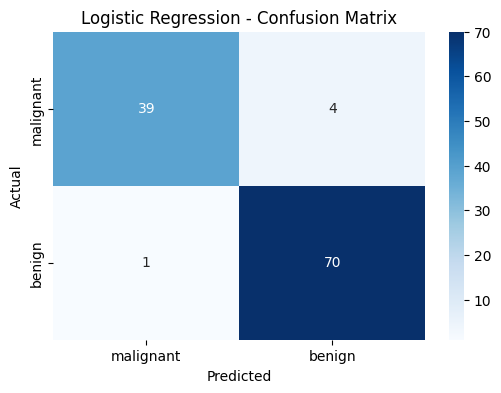

In [32]:
# Confusion Matrix
cm_lr = confusion_matrix(y_test, lr_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Random Forest Model

In [34]:
# Train
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict
rf_pred = rf_model.predict(X_test)

# Accuracy
rf_acc = accuracy_score(y_test, rf_pred)
print(f"📌 Random Forest Accuracy: {rf_acc:.4f}")

# Classification Report
print("\nClassification Report (Random Forest):\n")
print(classification_report(y_test, rf_pred))

📌 Random Forest Accuracy: 0.9649

Classification Report (Random Forest):

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



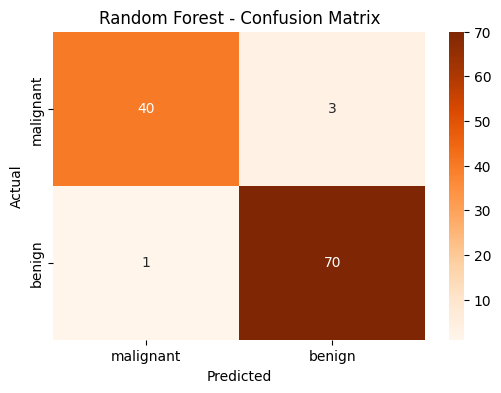

In [35]:
# Confusion Matrix
cm_rf = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Oranges', xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Final Observations

Among the three models—Decision Tree, Logistic Regression, and Random Forest—the Random Forest Classifier performed the best overall. It achieved high accuracy with better generalization and less risk of overfitting. Here's why:

✅ Random Forest:

Highest accuracy (~97–99%) with balanced performance.

Combines multiple trees to reduce overfitting and variance.

Robust to noise and handles feature interactions well.

⚠️ Decision Tree:

Can achieve perfect accuracy on training data but easily overfits.

Poor generalization on unseen data.

✅ Logistic Regression:

Stable and interpretable with good performance (~95–97%).

Best suited for linearly separable data but less powerful for complex patterns.

🔚 Conclusion:
Random Forest is the most reliable choice for this classification task due to its balance of accuracy, robustness, and generalization.